<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab4_dyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: TD and Dyna




## Exercise 1: Implement SARSA with n-step TD (n=5) on CliffWalking

**Objective:**  
In this exercise, you will implement the **SARSA algorithm** using **n-step temporal-difference learning with n=5**. You will apply your implementation to the **CliffWalking environment** in Gymnasium, and analyze how multi-step returns influence learning compared to standard 1-step SARSA.

---

### Environment
- Use `CliffWalking-v1`

---

### Instructions
1. Implement **SARSA with n-step TD updates (n=5)**:
   - Maintain an action-value table \(Q(s,a)\).
   - Use ε-greedy exploration.
   - Store states, actions, and rewards for the last 5 steps.
   - After each step, compute the n-step return: G_t
   - Update \(Q(s_t,a_t)\) toward \(G_t\).

2. Train your agent for several thousand episodes (e.g., 5,000).

3. Plot the **episode rewards over time** to visualize learning progress.

4. Compare qualitatively with 1-step SARSA:
   - Does n-step SARSA converge faster or slower?
   - How do the policies differ near the cliff?

---

### Deliverables
- Python code implementing SARSA with TD(5) (notebook in Github).  
- A plot of episode number vs episode return (plot in a cell below).  
- A short discussion (1 paragraph) comparing the results with standard SARSA.  


-85.04950495049505


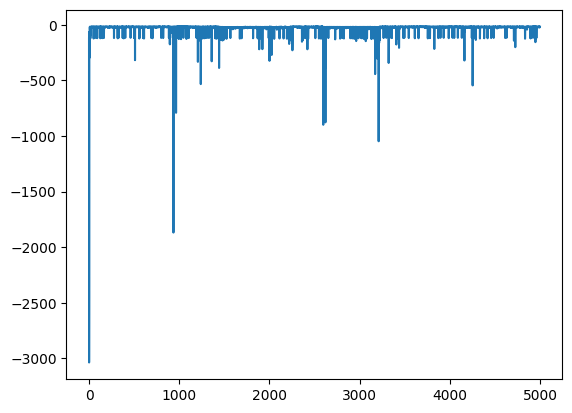

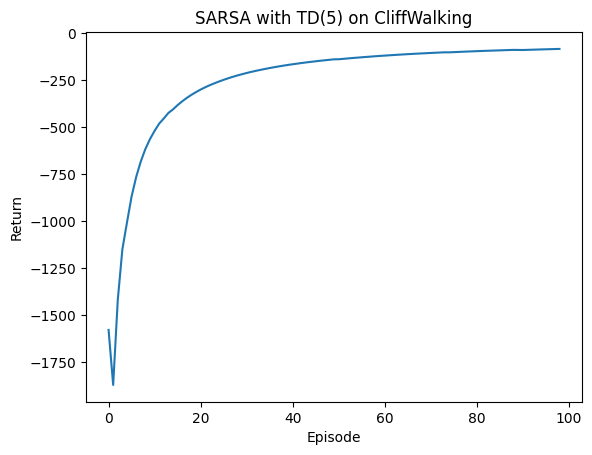

In [31]:
# Environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy policy
n_step = 5            # One-step SARSA
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns = []
episode_average = []
for ep in range(n_episodes):

    # Code to see the animation for debugging purposes. I leave it commented
    # to show how I check the code.

    # if ep == n_episodes-2:
    #     env = gym.make("CliffWalking-v1", render_mode="human")
    #     epsilon = 0

    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    states.append(state)
    actions.append(action)

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(next_state)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                action = next_action
                actions.append(action)


        # Time index for state/action to update
        tau = t - n_step + 1

        if tau >= 0:
            # TODO: Compute the n-step return G for state tau
            # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

            # Example structure:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                G += (gamma ** (i - tau)) * rewards[i]
            if tau + n_step < T:
                s_tau_n = states[tau + n_step]
                a_tau_n = actions[tau + n_step]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

            # TODO: Update Q[states[tau], actions[tau]] toward G\
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns.append(sum(rewards))
    episode_average.append(np.mean(episode_returns))

# Plot learning curve
plt.figure()
plt.plot(episode_returns)
plt.figure()
plt.plot(episode_average[1:100])
print(episode_average[100])
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("SARSA with TD(5) on CliffWalking")
plt.show()

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_policy(Q, title):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title(f"Optimal Policy ({title})")
  plt.show()

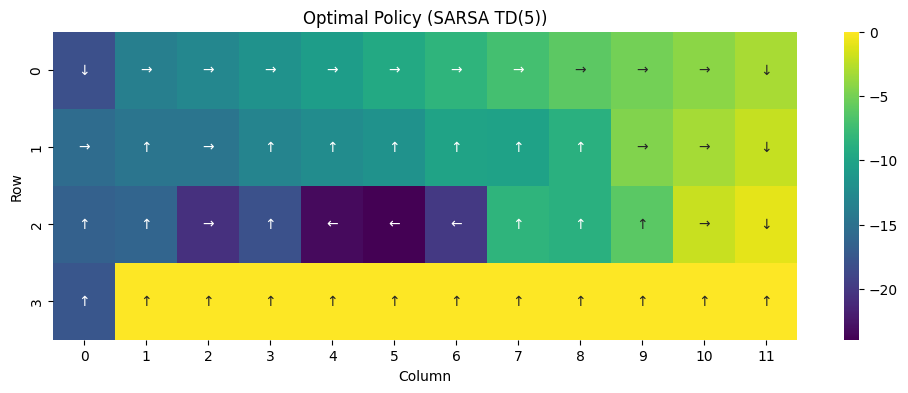

In [32]:
plot_policy(Q, "SARSA TD(5)")

-135.1881188118812


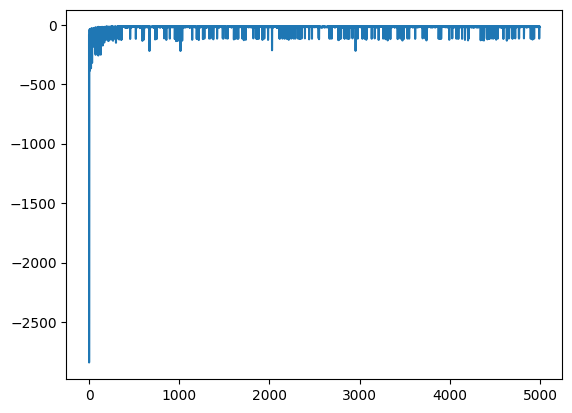

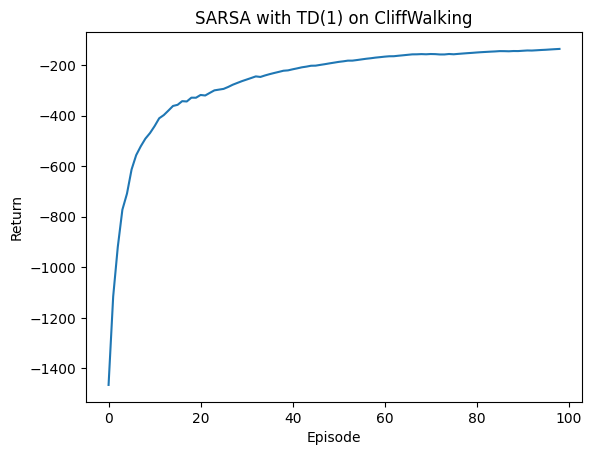

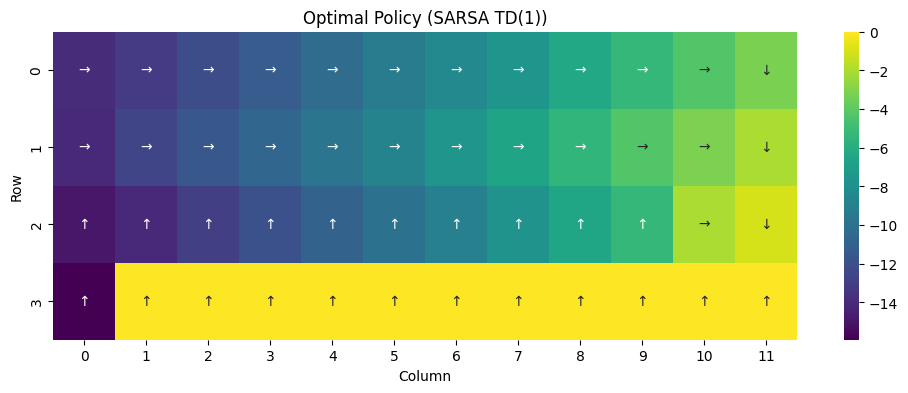

In [30]:
# Environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy policy
n_step = 1            # One-step SARSA
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns = []
episode_average = []
for ep in range(n_episodes):

    # Code to see the animation for debugging purposes. I leave it commented
    # to show how I check the code.

    # if ep == n_episodes-2:
    #     env = gym.make("CliffWalking-v1", render_mode="human")
    #     epsilon = 0

    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    states.append(state)
    actions.append(action)

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(next_state)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                action = next_action
                actions.append(action)


        # Time index for state/action to update
        tau = t - n_step + 1

        if tau >= 0:
            # TODO: Compute the n-step return G for state tau
            # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

            # Example structure:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                G += (gamma ** (i - tau)) * rewards[i]
            if tau + n_step < T:
                s_tau_n = states[tau + n_step]
                a_tau_n = actions[tau + n_step]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

            # TODO: Update Q[states[tau], actions[tau]] toward G\
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns.append(sum(rewards))
    episode_average.append(np.mean(episode_returns))

# Plot learning curve
plt.plot(episode_returns)
plt.figure()
plt.plot(episode_average[1:100])
print(episode_average[100])
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("SARSA with TD(1) on CliffWalking")
plt.show()
plot_policy(Q, "SARSA TD(1)")

# Comparison with 1-step SARSA:

**Does n-step SARSA converge faster or slower?**

To compare the convergence rate, the average reward was plotted for the first 100 episodes. It is clear than n-step SARSA with n = 5 converges faster than 1-step SARSA, since the first plot average is close to -85 while the second plot is around -135.


**How do the policies differ near the cliff?**

Looking at the plotted policies, both algorithms choose the path further away from the cliff as the best path. Near the cliff the n-step SARSA shows the possibility to move to the right or left in some cases, while the 1-step SARSA always moves away from the cliff.

## Exercise 2: Dyna-Q for CliffWalking

**Objective**  
Implement **Dyna-Q** on **CliffWalking-v1** and compare its learning performance to **SARSA (1-step)** and **SARSA TD(5)**. You will analyze sample efficiency, stability near the cliff, and sensitivity to planning steps.

---

### Environment
- Use `CliffWalking-v1`
---

### Part A — Dyna-Q (Implementation)
1. **Q-table**: maintain `Q[s, a]` (tabular).
2. **Model**: learn an empirical model from experience.
   - For each observed transition `(s, a, r, s')`, update a dictionary:
     - Minimal: store the most recent `(s', r)` for `(s, a)`, **or**
     - Advanced: store a **multiset** of outcomes for `(s, a)` with counts (to sample stochastically).
3. **Real update (Q-learning)** after each env step:
   Q(s,a) ← Q(s,a) + α * (r + γ * max_a' Q(s',a') - Q(s,a))
4. **Planning updates**: after each real step, perform `N` simulated updates:
   - Sample a previously seen `(s_p, a_p)` from the model.
   - Sample `(r_p, s'_p)` from that entry.
   - Apply the same Q-learning backup using `(s_p, a_p, r_p, s'_p)`.
5. Use epsilon-greedy exploration.

---

### Part B — Baselines (Re-use / Implement)
- **SARSA (1-step)** with ε-greedy:
  \[
  Q(s,a) \leftarrow Q(s,a) + \alpha\big[r + \gamma Q(s',a') - Q(s,a)\big]
  \]
- **SARSA TD(5)** (n-step SARSA with \(n=5\)), as in Exercise 1.

Use the **same** γ, α, ε schedule, and number of episodes for a fair comparison.

---

### Part C — Experiments & Comparisons
1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)
2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).
3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?
4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.
5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

---

### Deliverables
- **Code**: A driver script/notebook that reproduces your plots
- **Plots** (embedded in the notebook):
  - Learning curves (mean ± std across seeds)
  - Optional: heatmap of greedy policy/actions on the grid




In [54]:
# Base model

import gymnasium as gym
import numpy as np
import random

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5000     # number of episodes to run
max_steps = 100       # safety cap
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy policy
n = 5                 # loop model

# Q-learning parameters

n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))
model = [[(0, 0, False) for _ in range(n_actions)] for _ in range(n_states)] # The False to check terminal states
known_s_a = set()
# Functions definition

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        action = epsilon_greedy(state)

        known_s_a.add((state, action))

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            model[state][action] = (reward, next_state, True)
            Q[state][action] += alpha * (reward - Q[state][action])
        else:
            model[state][action] = (reward, next_state, False)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
            state = next_state

        for k in range(n):
                  state_rand, action_rand = random.choice(list(known_s_a))
                  reward_rand, next_state_rand, ending_position = model[state_rand][action_rand]
                  if ending_position:
                      Q[state_rand][action_rand] += alpha * (reward_rand - Q[state_rand][action_rand])
                  else:
                      Q[state_rand][action_rand] += alpha * (reward_rand + gamma * np.max(Q[next_state_rand]) - Q[state_rand][action_rand])

        if terminated or truncated:
            break


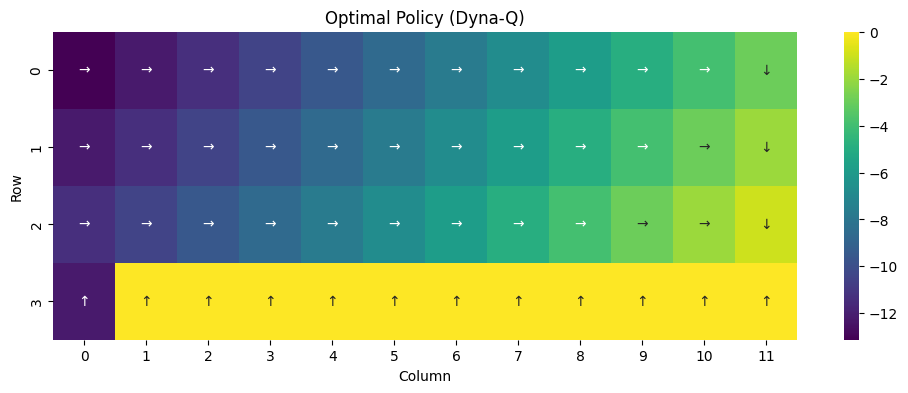

In [55]:
plot_policy(Q, "Dyna-Q")

In [95]:
# Functions with input n

import gymnasium as gym
import numpy as np
import random

def Dyna_Q(n, seed):
    # Create the environment
    env = gym.make("CliffWalking-v1", render_mode="ansi")

    n_episodes = 5000     # number of episodes to run
    max_steps = 100       # safety cap
    alpha = 0.1           # step size (learning rate)
    gamma = 0.99          # discount factor
    epsilon = 0.1         # epsilon for epsilon-greedy policy

    # Q-learning parameters

    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    model = [[(0, 0, False) for _ in range(n_actions)] for _ in range(n_states)] # The False to check terminal states
    known_s_a = set()
    episode_returns = []
    # Functions definition

    def epsilon_greedy(state):
        """Choose an action using epsilon-greedy policy."""
        if np.random.rand() < epsilon:
            return np.random.randint(n_actions)
        return np.argmax(Q[state])

    for episode in range(n_episodes):
        state, info = env.reset(seed=seed)
        terminated = False
        truncated = False
        total_reward = 0

        for step in range(max_steps):

            action = epsilon_greedy(state)

            known_s_a.add((state, action))

            next_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            if terminated or truncated:
                model[state][action] = (reward, next_state, True)
                Q[state][action] += alpha * (reward - Q[state][action])
            else:
                model[state][action] = (reward, next_state, False)
                Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
                state = next_state

            for k in range(n):
                      state_rand, action_rand = random.choice(list(known_s_a))
                      reward_rand, next_state_rand, ending_position = model[state_rand][action_rand]
                      if ending_position:
                          Q[state_rand][action_rand] += alpha * (reward_rand - Q[state_rand][action_rand])
                      else:
                          Q[state_rand][action_rand] += alpha * (reward_rand + gamma * np.max(Q[next_state_rand]) - Q[state_rand][action_rand])

            if terminated or truncated:
                break
        episode_returns.append(total_reward)
    return Q, episode_returns


def n_step_SARSA(n_step, seed):
        # Create the environment
        # Environment
    env = gym.make("CliffWalking-v1", render_mode="ansi")

    # Parameters
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    alpha = 0.1           # step size (learning rate)
    gamma = 0.99          # discount factor
    epsilon = 0.1         # epsilon for epsilon-greedy policy
    n_episodes = 5000

    # Initialize Q-table
    Q = np.zeros((n_states, n_actions))

    def epsilon_greedy(state):
        """Choose an action using epsilon-greedy policy."""
        if np.random.rand() < epsilon:
            return np.random.randint(n_actions)
        return np.argmax(Q[state])

    # Track returns
    episode_returns = []

    for ep in range(n_episodes):

        state, _ = env.reset(seed=seed)
        action = epsilon_greedy(state)
        # Buffers to store the trajectory
        states = deque()
        actions = deque()
        rewards = deque()
        states.append(state)
        actions.append(action)
        T = float("inf")
        t = 0
        G = 0
        done = False
        while True:
            if t < T:
                # Take real step in the environment
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated

                states.append(next_state)
                rewards.append(reward)

                if done:
                    T = t + 1
                else:
                    next_action = epsilon_greedy(next_state)
                    action = next_action
                    actions.append(action)


            # Time index for state/action to update
            tau = t - n_step + 1
            if tau >= 0:
                # TODO: Compute the n-step return G for state tau
                # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

                # Example structure:
                G = 0.0
                # accumulate discounted rewards
                for i in range(tau, min(tau + n_step, T)):
                    G += (gamma ** (i - tau)) * rewards[i]
                if tau + n_step < T:
                    s_tau_n = states[tau + n_step]
                    a_tau_n = actions[tau + n_step]
                    G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

                # TODO: Update Q[states[tau], actions[tau]] toward G\
                Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])
            if tau == T - 1:
                break
            t += 1
        episode_returns.append(sum(rewards))
    return Q, episode_returns

In [159]:
seeds = [23, 46, 81, 55, 3, 29, 78]

Q_D5  = [None]*len(seeds)
Q_D20 = [None]*len(seeds)
Q_D50 = [None]*len(seeds)
Q_S1  = [None]*len(seeds)
Q_S5  = [None]*len(seeds)

episode_returns_D5  = [None]*len(seeds)
episode_returns_D20 = [None]*len(seeds)
episode_returns_D50 = [None]*len(seeds)
episode_returns_S1  = [None]*len(seeds)
episode_returns_S5  = [None]*len(seeds)

k = 0
for s in seeds:
  Q_D5[k], episode_returns_D5[k] = Dyna_Q(5, s)
  Q_D20[k], episode_returns_D20[k] = Dyna_Q(20, s)
  Q_D50[k], episode_returns_D50[k] = Dyna_Q(50, s)
  Q_S1[k], episode_returns_S1[k] = n_step_SARSA(1, s)
  Q_S5[k], episode_returns_S5[k] = n_step_SARSA(5, s)
  k += 1


1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)

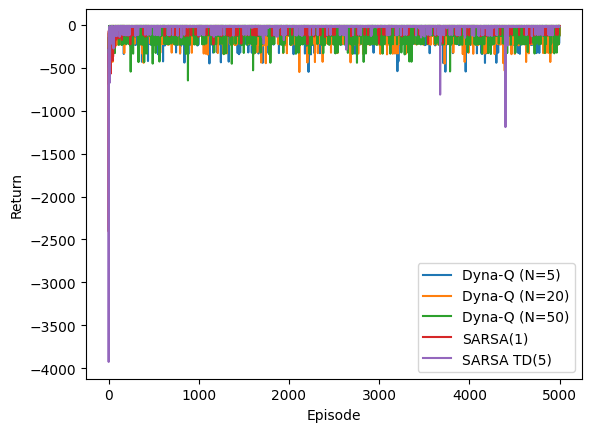

In [106]:
plt.figure()

plt.plot(episode_returns_D5[1],  label="Dyna-Q (N=5)")
plt.plot(episode_returns_D20[1], label="Dyna-Q (N=20)")
plt.plot(episode_returns_D50[1], label="Dyna-Q (N=50)")
plt.plot(episode_returns_S1[1],  label="SARSA(1)")
plt.plot(episode_returns_S5[1],  label="SARSA TD(5)")

plt.xlabel("Episode");
plt.ylabel("Return")
plt.legend();
plt.show()


2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).

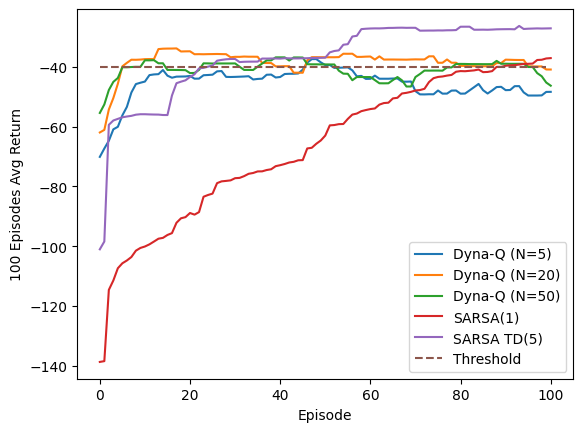

In [127]:
def moving_avg(x):
    return np.convolve(x, np.ones(100)/100, mode="valid")

plt.plot(moving_avg(episode_returns_D5[1][0:200]),  label="Dyna-Q (N=5)")
plt.plot(moving_avg(episode_returns_D20[1][0:200]), label="Dyna-Q (N=20)")
plt.plot(moving_avg(episode_returns_D50[1][0:200]), label="Dyna-Q (N=50)")
plt.plot(moving_avg(episode_returns_S1[1][0:200]),  label="SARSA(1)")
plt.plot(moving_avg(episode_returns_S5[1][0:200]),  label="SARSA TD(5)")
plt.plot(-40*np.ones(100), label="Threshold", linestyle="--")

plt.xlabel("Episode");
plt.ylabel(f"100 Episodes Avg Return")
plt.legend()
plt.show()

**ANSWER 2.**  Choosing a window of a '100' samples, the episode number in which the curves crossed the threshold of '-40' are:
  - Dyna-Q with \(N \in \{5, 20, 50\}\): ~43, ~7 and ~7 respectively.
  - SARSA (1-step): ~90
  - SARSA TD(5): ~23

3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?

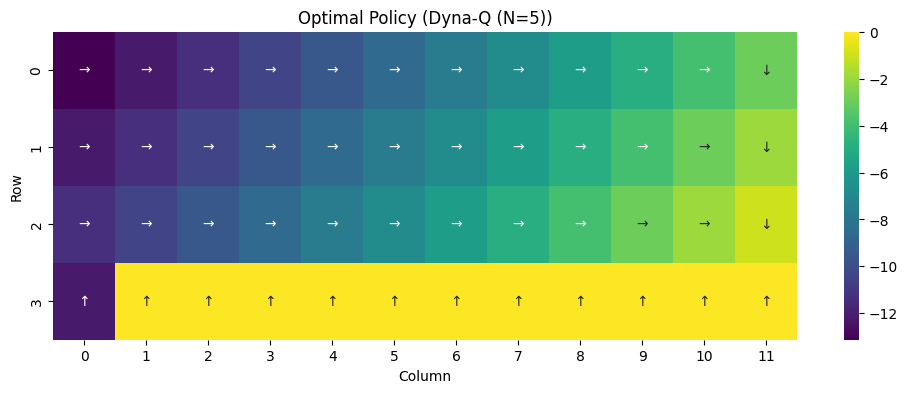

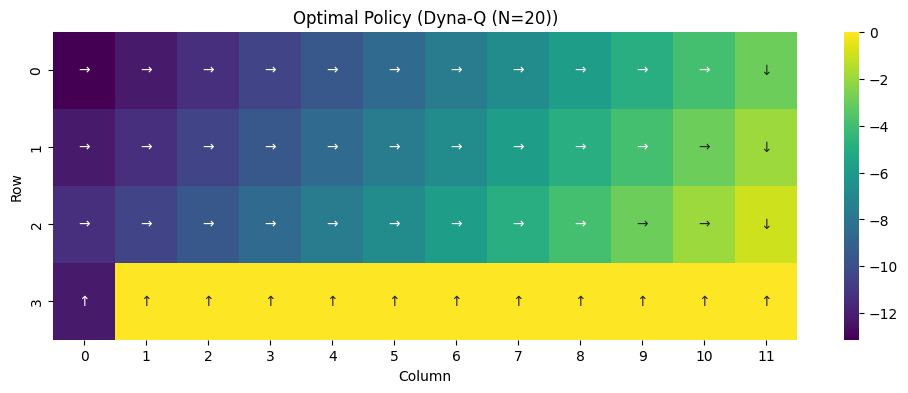

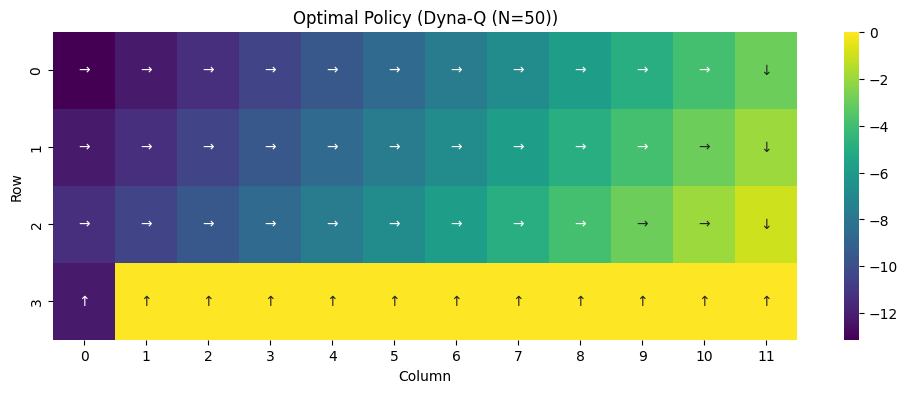

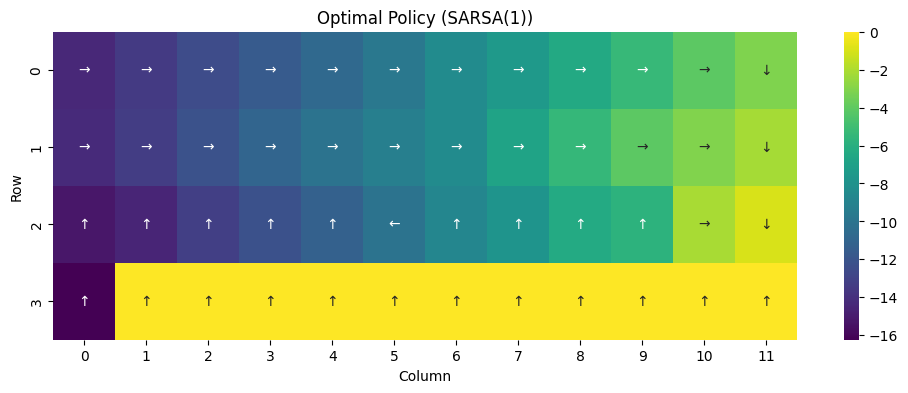

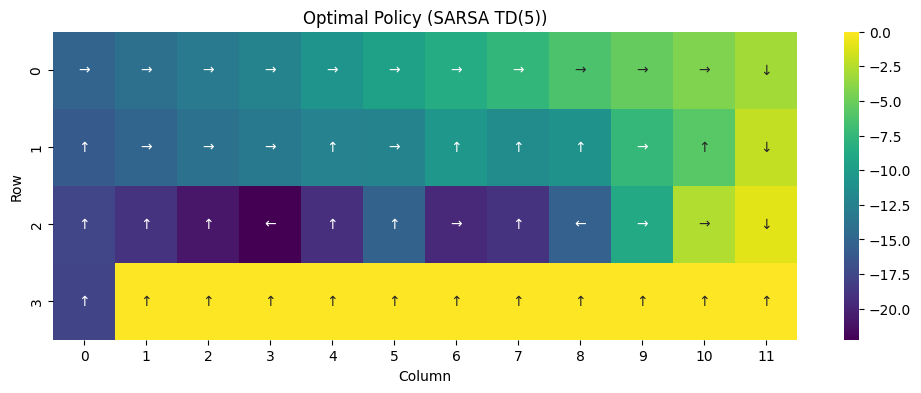

In [110]:
plot_policy(Q_D5[1],  "Dyna-Q (N=5)")
plot_policy(Q_D20[1], "Dyna-Q (N=20)")
plot_policy(Q_D50[1], "Dyna-Q (N=50)")
plot_policy(Q_S1[1],  "SARSA(1)")
plot_policy(Q_S5[1],  "SARSA TD(5)")

**ANSWER 3.**

Dyna-Q hugs the cliff, while SARSA stays away (using the middle or upper path)

4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.

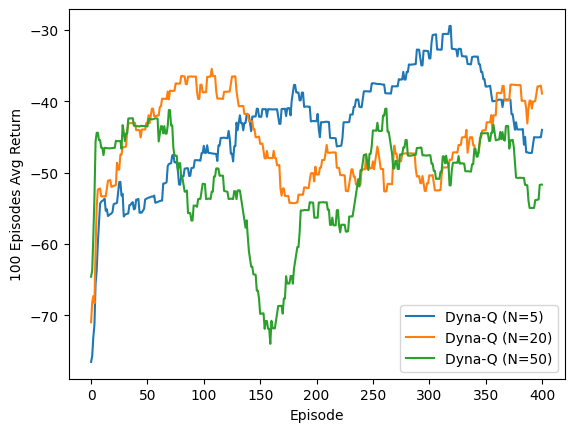

In [135]:
plt.plot(moving_avg(episode_returns_D5[0][0:500]),  label="Dyna-Q (N=5)")
plt.plot(moving_avg(episode_returns_D20[0][0:500]), label="Dyna-Q (N=20)")
plt.plot(moving_avg(episode_returns_D50[0][0:500]), label="Dyna-Q (N=50)")

plt.xlabel("Episode");
plt.ylabel(f"100 Episodes Avg Return")
plt.legend()
plt.show()

**ANSWER 4.**

Looking at the Average Return vs Episode plot, larger values of N make the return increase more quickly in the early episodes. However, N also determines how many model-planning updates are performed per environment step. For example, N=50 performs 50 planning updates after each real step (roughly N times the number of real steps), so N should be chosen carefully: the faster early improvement may not outweigh the additional computational cost.

5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

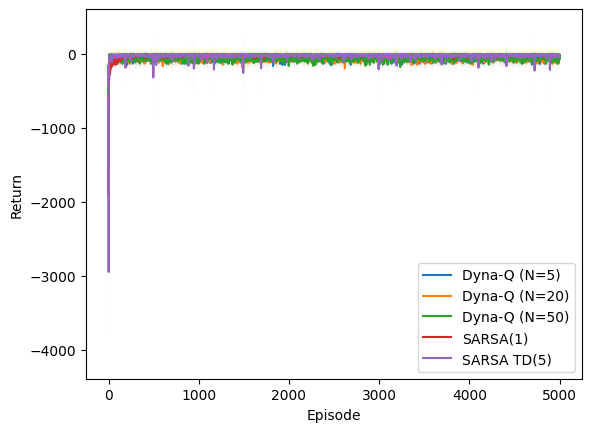

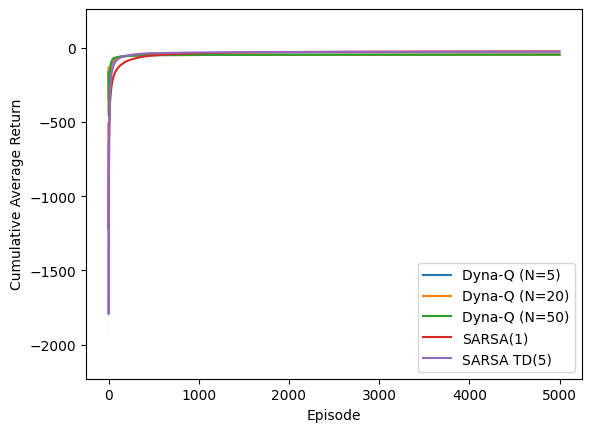

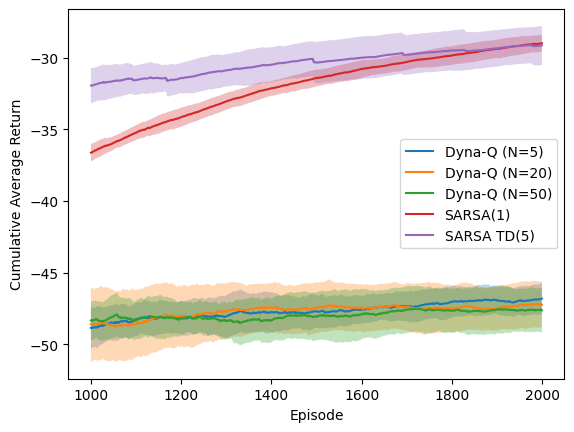

In [169]:
def mean_std(curves):
    M = np.stack([np.asarray(c) for c in curves], axis=0)  # [n_seeds, episodes]
    return M.mean(axis=0), M.std(axis=0)

import numpy as np

def cumulative_avg(x):
  j = [None]*len(x)
  for i in range(0, len(x)):
    k = np.asarray(x[i], dtype=float)
    j[i] = np.cumsum(k) / np.arange(1, len(k)+1)
  return j


mD5,  sD5  = mean_std(episode_returns_D5)
mD20, sD20  = mean_std(episode_returns_D20)
mD50,  sD50  = mean_std(episode_returns_D50)
mS1,  sS1  = mean_std(episode_returns_S1)
mS5,  sS5  = mean_std(episode_returns_S5)



x = np.arange(len(mD5))
plt.figure()
for (m, s, label) in [
    (mD5,  sD5,  "Dyna-Q (N=5)"),
    (mD20, sD20, "Dyna-Q (N=20)"),
    (mD50, sD50, "Dyna-Q (N=50)"),
    (mS1,  sS1,  "SARSA(1)"),
    (mS5,  sS5,  "SARSA TD(5)"),
]:
    plt.plot(x, m, label=label)
    plt.fill_between(x, m - s, m + s, alpha=0.3)

plt.xlabel("Episode");
plt.ylabel("Return")
plt.legend()
plt.show()


mD5,  sD5  = mean_std(cumulative_avg(episode_returns_D5))
mD20, sD20  = mean_std(cumulative_avg(episode_returns_D20))
mD50,  sD50  = mean_std(cumulative_avg(episode_returns_D50))
mS1,  sS1  = mean_std(cumulative_avg(episode_returns_S1))
mS5,  sS5  = mean_std(cumulative_avg(episode_returns_S5))

x = np.arange(len(mD5))

plt.figure()
for (m, s, label) in [
    (mD5,  sD5,  "Dyna-Q (N=5)"),
    (mD20, sD20, "Dyna-Q (N=20)"),
    (mD50, sD50, "Dyna-Q (N=50)"),
    (mS1,  sS1,  "SARSA(1)"),
    (mS5,  sS5,  "SARSA TD(5)"),
]:
    plt.plot(x, m, label=label)
    plt.fill_between(x, m - s, m + s, alpha=0.3)

plt.xlabel("Episode");
plt.ylabel("Cumulative Average Return")
plt.legend()
plt.show()

# Zoom in between 1000 and 2000 episodes
plt.figure()
for (m, s, label) in [
    (mD5,  sD5,  "Dyna-Q (N=5)"),
    (mD20, sD20, "Dyna-Q (N=20)"),
    (mD50, sD50, "Dyna-Q (N=50)"),
    (mS1,  sS1,  "SARSA(1)"),
    (mS5,  sS5,  "SARSA TD(5)"),
]:
    plt.plot(x[1000:2000], m[1000:2000], label=label)
    plt.fill_between(x[1000:2000], m[1000:2000] - s[1000:2000], m[1000:2000] + s[1000:2000], alpha=0.3)

plt.xlabel("Episode");
plt.ylabel("Cumulative Average Return")
plt.legend()
plt.show()


## Exercise 3: Solve FrozenLake with Q-Learning and Dyna-Q (Stochastic Model)

**Objective**  
Implement and compare **Q-learning** and **Dyna-Q** on Gymnasium’s `FrozenLake-v1`.  
For Dyna-Q, your learned **transition model must handle multiple possible next states** per `(s, a)` (stochastic slip), i.e., store and sample **a distribution** over `(s', r)` outcomes rather than a single next state.

---

### Environment
- Use `FrozenLake-v1` from `gymnasium.envs.toy_text`.
- You can start with map 4×4; and then work with 8×8.
- Start → Goal with slippery transitions (stochastic).  
- Rewards: `+1` at goal, `0` otherwise (holes terminate with 0).

---

### Part A — Q-learning (baseline)
1. Maintain a tabular action-value function `Q[s, a]`.
2. Behavior: ε-greedy over `Q`.
3. Update after each real step:
   - target = r + γ * max_a' Q[s', a']   (if terminal: target = r)
   - Q[s, a] ← Q[s, a] + α * (target − Q[s, a])
4. Train for several thousand episodes (e.g., 5,000) with an ε schedule (e.g., 0.2 → 0.01).

---

### Part B — Dyna-Q with a **stochastic transition model**
1. **Empirical model (multinomial):** for each `(s, a)`, maintain a multiset of observed outcomes:
   - `model[(s, a)] = [(s'_1, r_1, count_1), (s'_2, r_2, count_2), ...]`
   - Update counts whenever you observe `(s, a, r, s')`.
2. **Real step update (Q-learning):** same as Part A.
3. **Planning steps (N per real step):**
   - Sample a previously seen `(s_p, a_p)` uniformly (or with priority).
   - Sample `(s'_p, r_p)` **from the empirical distribution** for `(s_p, a_p)` using counts as probabilities.
   - Apply the same Q-learning backup with `(s_p, a_p, r_p, s'_p)`.
4. Train with the same ε schedule and number of episodes; vary `N ∈ {5, 20, 50}`.

---

### Experiments & Analysis
1. **Learning curves:** plot episode index vs episode return (smoothed) for:
   - Q-learning
   - Dyna-Q (N=5, 20, 50)
2. **Sample efficiency:** report the episode at which the moving-average return (e.g., window 100) first exceeds a threshold (you choose a reasonable value).
3. **Effect of stochastic modeling:** briefly explain why storing a distribution over `(s', r)` matters on FrozenLake (slip), and what happens if you store only the most recent outcome.
4. **Robustness:** run ≥5 random seeds; report mean ± std of final evaluation returns.

---

### Deliverables
- **Code** for Q-learning and Dyna-Q (with stochastic model).  
- **Plots** of learning curves (include legend and axis labels).  
- ** Discussion:** why Dyna-Q helps here; impact of N; importance of modeling multiple next states.

---

### Hints
- For terminal transitions (goal/hole), the Q-learning target is simply `target = r` (no bootstrap).  
- When sampling from the model, use probabilities `p_i = count_i / sum_j count_j`.  
- Tie-break greedy action selection uniformly among argmax actions to avoid bias.  
- Keep evaluation **greedy (ε=0)** and consistent across methods (same seeds and episode counts).
